In [11]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# 1 Regresión Lineal Ordinaria (LSS)

## a)

In [12]:
df = pd.read_csv("kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

## b)

In [13]:
df.shape

(21613, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## c)

In [56]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))
#df_scaled_train.info()
#Xtest.info()

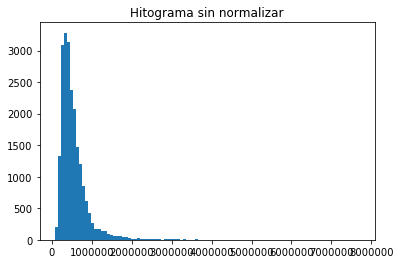

In [29]:
from matplotlib.pylab import hist, show

plt.title("Hitograma sin normalizar")
plt.hist(df['price'],bins=100)
plt.show()

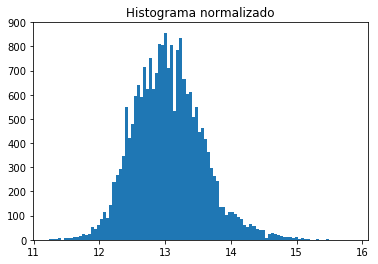

In [23]:
plt.title("Histograma normalizado")
plt.hist(y, bins=100)
plt.show()

In [48]:
#df_scaled_train.describe()

## d)

In [49]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [59]:
# Precision de la prediccion 
#print(Xtest.shape)

## e) Pesos y Z-score

In [66]:
import scipy as sc
from scipy import stats
from numpy import linalg
from tabulate import tabulate

Tenemos que los pesos asignados a cada variable serán los coeficientes $\hat{\beta}$ estimados en los puntos anteriores mediante el metodo de minimos cuadrados. Por otro lado tenemos que los Z-Score se obtienen siguien $\displaystyle z_i = \frac{\hat{\beta_i}}{\sigma_i\sqrt{v_i}}$, donde $v_i$ es el elemento $i-esimo$ de la diagonal de la matriz $(X^tX)^{-1}$

In [98]:
#Se carga el dataframe de los datos de entrenamiento en una arreglo para poder trabajar con los datos

X = np.array(df_scaled_train)
#Se guarda la traspuesta de la matriz 
Xt = np.transpose(X)
#se computa el producto matricial entre la Xt y X 
XtX = np.dot(Xt,X)
# Se calcula la inversa de XtX
V = np.linalg.inv(XtX)
# Se guarda la diagonal de la matriz
Vdiag = np.diag(V)
#Se obtienen los coeficientes
betas = linreg.coef_
#se obtiene la desviacion estandar para cada variable
sigma = df_scaled.std()
#Se calculan los z-score
Zscore = betas/(sigma*np.sqrt(Vdiag))


In [102]:
d = {'1. Nombre_regresor' : df_scaled_train.columns,'2. Coeficientes' : pd.Series(betas),'3. z-score': pd.Series(np.array(Zscore))}
print(pd.DataFrame(d))

   1. Nombre_regresor  2. Coeficientes    3. z-score
0            bedrooms    -1.265658e-02 -2.291882e+00
1           bathrooms     5.715384e-02  3.862952e+00
2         sqft_living     9.314485e+11  1.554381e+07
3            sqft_lot     2.220457e-02  1.874544e+00
4              floors     3.437315e-02  3.019025e+00
5          waterfront     3.369405e-02  3.794830e+00
6                view     4.345492e-02  4.509153e+00
7           condition     4.746281e-02  5.343739e+00
8               grade     1.853509e-01  1.226793e+01
9          sqft_above    -8.287169e+11 -1.553280e+07
10      sqft_basement    -4.626425e+11 -1.553417e+07
11           yr_built    -1.033325e-01 -8.471048e+00
12       yr_renovated     1.593018e-02  1.827264e+00
13                lat     1.879883e-01  2.181782e+01
14               long    -3.768921e-03 -3.777824e-01
15      sqft_living15     8.206177e-02  5.823278e+00
16         sqft_lot15    -6.713867e-03 -5.601565e-01
17          intercept     1.303283e+01  1.6030

## f)

In [61]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))
yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
from sklearn.model_selection import KFold
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
    columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept',
    np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    yhat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10

linreg.score(x_test,ytest)

-1.6651072400311306e+18

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Estandarizacion del dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#a = df['price']
#No entiendo por que se hace este paso
df_scaled['price'] = np.log(df['price'])

In [35]:
#Se guarda en la variable X todo el dataset menos la columna "price"
X = df_scaled.iloc[:,1:]
#Se registra la cantidad de filas en la variable N
N = X.shape[0]
# Se le agrega al dtaframe X la columna "intercept" llena de 1
X.insert(X.shape[1], 'intercept', np.ones(N))
# Se gusrda la columna "price" del dataframe estandarizado en y
y = df_scaled['price']
# Se crea un vector de 0 del largo del dataframe X
mask = np.zeros(len(X))
# Se crea la variable limit con el 70% del largo del dataframe X
limit = int(len(X)*0.7)
# Se setea con el valor 1 de 0 hasta limit los campos del vector mask
mask[:limit] = 1
# Se crea un vector que indica si la data es de entrenamiento o no
istrain = mask == 1
# Se genera la data de etrenamiento usando el vector istrain aplicado a X e y
Xtrain = X[istrain]
ytrain = y[istrain]
# Se genera la data de test con el 30% restante de X e y
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
#Se hace la regresion lineal usando los datos de entrenamiento
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
#Coeficientes obtenidos con la regresion sobre los datos de entrenamiento
print('Coeficientes: \n', linreg.coef_)

Coeficientes: 
 [ -1.17271076e-02   5.81885886e-02  -1.58715935e+12   2.23001628e-02
   3.73612585e-02   3.32179130e-02   4.23151454e-02   4.59551654e-02
   1.85939556e-01   1.43102549e+12   7.64814719e+11  -1.10168457e-01
   1.51367188e-02   1.86401367e-01  -3.96728516e-03   8.58154297e-02
  -7.14111328e-03   1.30399399e+01]


In [36]:
Xtrain.shape

(15129, 18)